<strong>Estatística Frequências e Medidas
Desafio Final</strong>

Considerando a base de dados de enem_2023.json responda as questões
abaixo (os dados são fictícios).

Você é uma pesquisadora de um cursinho para estudantes que querem
ingressar na universidade em 2025. Seu objetivo é retirar informações da
base de dados do enem do ano anterior para alinhar melhor as estratégias do
cursinho para cada estudante.

O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o
gênero das pessoas que fizeram a prova. No dado existe a representação de
1000 pessoas, sendo cada uma delas uma linha.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

In [321]:
caminho_arquivo = r'C:\Users\znaya\Desktop\Bootcamp - Data Analytics\Estatística - Medidas e Frequências\Desafio 1\enem_2023.json'
df_enem = pd.read_json(caminho_arquivo)

In [306]:
df_enem.head(5)
# Cada linha uma pessoa, suas notas de cada disciplina e gênero

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [67]:
for column in df_enem:
     print(f"{column}: {df_enem[column].dtype}")

Linguagens: float64
Ciências humanas: float64
Ciências da natureza: float64
Matemática: float64
Redação: float64
Sexo: object


### 1. Qual das disciplinas tem a maior amplitude de nota?


In [216]:
# Percorrer cada uma das colunas e calcular sua amplitude

def amp(dataframe):
    
    for column in dataframe.select_dtypes(include=np.number):
        amplitude = (dataframe[column].max() - dataframe[column].min())
        print(f"{column} - {amplitude:.2f}")
    
    

In [217]:
amp(df_enem)

Linguagens - 517.46
Ciências humanas - 474.02
Ciências da natureza - 487.60
Matemática - 488.08
Redação - 729.16


##### Redação possui maior amplitude

### 2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [307]:
def median_mean(dataframe):
    for column in dataframe.select_dtypes(include=np.number):
        media = dataframe[column].mean()
        mediana = dataframe[column].median(skipna=True)
        print(f"{column} - Média: {media:.2f} | Mediana: {mediana:.2f}")

In [308]:
median_mean(df_enem)

Linguagens - Média: 514.52 | Mediana: 515.05
Ciências humanas - Média: 527.04 | Mediana: 524.52
Ciências da natureza - Média: 499.32 | Mediana: 500.48
Matemática - Média: 535.97 | Mediana: 533.25
Redação - Média: 637.78 | Mediana: 635.27


### 3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:
* a. Redação - 2
* b. Matemática e suas Tecnologias - 4
* c. Linguagens, Códigos e suas Tecnologias - 2
* d. Ciências Humanas e suas Tecnologias - 1
* e. Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem
colocados considerando esses pesos?


In [109]:
df_media_ufpe = df_enem
df_media_ufpe = df_media_ufpe.dropna()

In [110]:
df_media_ufpe['Média Ponderada'] = (
    df_media_ufpe['Redação'] * 2 +
    df_media_ufpe['Matemática'] * 4 +
    df_media_ufpe['Linguagens'] * 2 +
    df_media_ufpe['Ciências humanas'] * 1 +
    df_media_ufpe['Ciências da natureza'] * 1
) / 10
df_media_ufpe.head(3)


,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Média Ponderada
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem,515.020199
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem,623.192417
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem,576.526064


In [111]:
media_ufpe_500 = df_media_ufpe.sort_values("Média Ponderada",ascending=False)
media_ufpe_500 = media_ufpe_500.head(500)

In [118]:
for column in media_ufpe_500.select_dtypes(include=np.number):
    m = media_ufpe_500[column].meanA()
    print(f"{column}: {m:.2f}")

Linguagens: 522.84
Ciências humanas: 529.92
Ciências da natureza: 503.09
Matemática: 547.41
Redação: 652.29
Média Ponderada: 557.29


In [119]:
for column in media_ufpe_500.select_dtypes(include=np.number):
    d = media_ufpe_500[column].std()
    print(f"{column}: {d:.2f}")

Linguagens: 80.77
Ciências humanas: 77.13
Ciências da natureza: 78.61
Matemática: 83.24
Redação: 109.96
Média Ponderada: 40.44


### 4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [115]:
cc_aprovados = media_ufpe_500.head(40).sort_values("Média Ponderada",ascending=False)

In [116]:
cc_aprovados

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Média Ponderada
25,604.825455,447.532353,523.041011,727.181224,870.464077,Mulher,682.987732
824,533.812379,611.760520,494.994598,807.877902,697.570213,Não idenficado,680.103191
702,551.398112,637.818208,451.624683,803.769938,652.669636,Homem,671.265814
129,583.015454,434.261543,588.516699,687.621711,852.273821,Mulher,664.384364
60,498.394660,668.355060,457.371963,760.136151,711.458481,Mulher,658.597791
880,671.524266,590.780179,546.595272,571.607337,909.379934,Homem,658.561320
376,364.096042,582.024626,523.764760,749.912621,872.188740,Não idenficado,657.800943
989,462.051713,512.986241,506.405210,787.771672,692.814673,Homem,648.021091
694,497.493880,609.839007,528.413513,737.175029,693.739043,Mulher,646.941848
965,660.913894,613.882660,433.935910,580.908082,881.465882,Mulher,645.621045


In [117]:
cc_aprovados = cc_aprovados.describe().drop(["count","min","25%","50%","75%","max"],axis=0)
cc_aprovados.loc["variancia"] = cc_aprovados.loc["std"] ** 2

In [118]:
cc_aprovados

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Média Ponderada
mean,586.276605,554.327484,522.298209,655.650831,747.522593,636.682742
std,102.643398,80.066997,71.969522,79.995782,105.025131,17.197892
variancia,10535.667205,6410.724088,5179.612094,6399.325107,11030.278108,295.767504


### 5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [219]:
def terceiro_quartil(df, coluna):
    terceiro_quartil = df[coluna].quantile(0.75)
    print(f"{coluna}: {terceiro_quartil}")

In [222]:
df_enem_terceiro_quartil = df_enem[["Linguagens", "Matemática"]]
    
for coluna in df_enem_terceiro_quartil:
    terceiro_quartil(df_enem_terceiro_quartil, coluna)

Linguagens: 571.6358759278
Matemática: 592.9129628887


### 6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?


##### Sim, os histogramas são simétricos, nota-se o formato de sino com a linha de densidade e a concentração dos dados com um pico ao redor da média e mediana

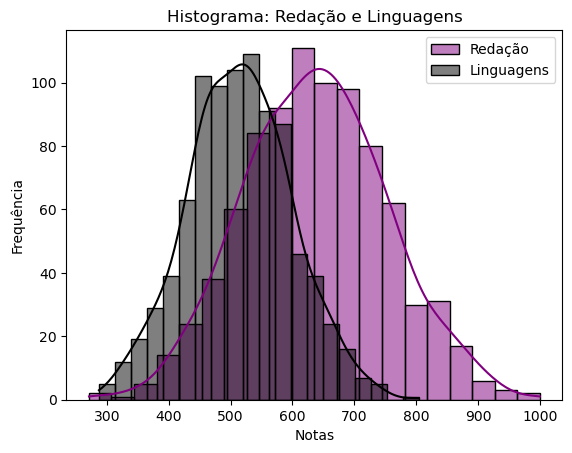

In [309]:
# Dados de exemplo (suponha que df_enem já tenha sido carregado)
df_redacao_linguagens = df_enem[["Redação", "Linguagens"]]

# Plotar histograma para cada coluna com rótulos
sns.histplot(df_redacao_linguagens["Redação"], bins=20, kde=True, color='purple', label='Redação')
sns.histplot(df_redacao_linguagens["Linguagens"], bins=20, kde=True, color='#0000', label='Linguagens')


# Adiciona rótulos e título
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.title('Histograma: Redação e Linguagens')

# Adiciona legenda
plt.legend()

plt.show()

### 7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

##### Sim pois se uma distribuição é verdadeiramente normal, ela manterá sua natureza normal independentemente de intervalos.

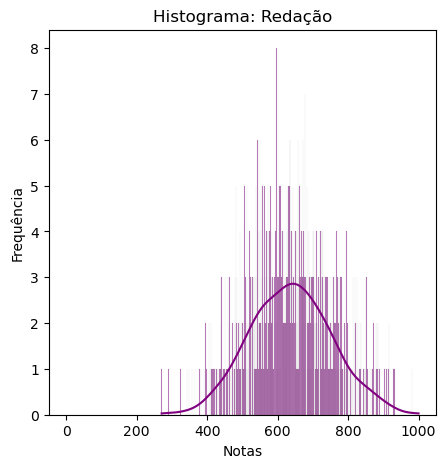

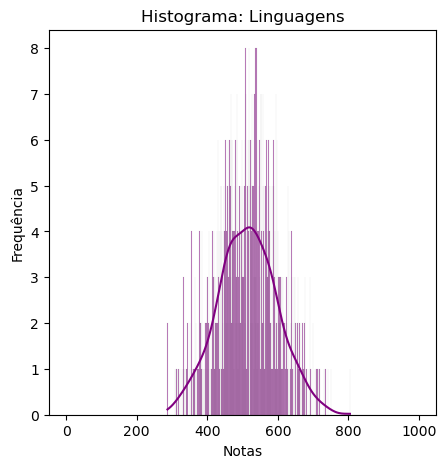

In [121]:
for column in df_redacao_linguagens.columns:
    plt.figure(figsize=(5,5))
    sns.histplot(x=df_redacao_linguagens[column], bins=range(0, 1000), edgecolor='black', color='purple', kde=True) 
    # Adiciona rótulos e título
    plt.xlabel('Notas')
    plt.ylabel('Frequência')
    plt.title(f'Histograma: {column}')
    plt.show()


### 8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.


##### Sim é possível identificar outliers, porém não são dados inconsistentes e sim alunos que tiveram grandes desempenhos

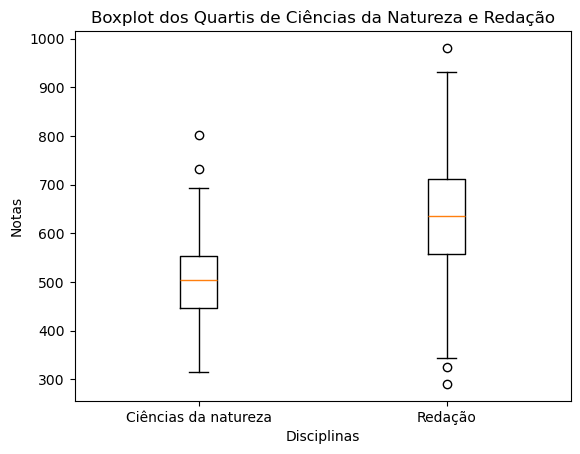

In [310]:
df_ciencias_redacao = df_enem[["Ciências da natureza", "Redação"]].dropna() # Utilizar dropna para não ocorrer divergência no boxplot

# Criar o boxplot
plt.boxplot(df_ciencias_redacao.values, labels=df_ciencias_redacao.columns)

# Adicionar rótulos e título
plt.xlabel('Disciplinas')
plt.ylabel('Notas')
plt.title('Boxplot dos Quartis de Ciências da Natureza e Redação')

# Exibir o boxplot
plt.show()

In [89]:
def calc_outlier(dataframe, column):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    outliers = []
    
    for value in dataframe[column].values:
        if ((value < lower) or (value > upper)):
            outliers.append(value)
    print(f'Coluna: {column} numero de outliers encontrados: ', len(outliers))   
    

In [90]:
for column in df_ciencias_redacao:
    calc_outlier(df_ciencias_redacao,column)

Coluna: Ciências da natureza numero de outliers encontrados:  2
Coluna: Redação numero de outliers encontrados:  3


In [66]:
Q1 = df_ciencias_redacao.quantile(0.25)
Q3 = df_ciencias_redacao.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_ciencias_redacao < (Q1 - 1.5 * IQR)) | (df_ciencias_redacao > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n ", outliers)

Outliers:
  Ciências da natureza    2
Redação                 3
dtype: int64


### 9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)

In [311]:
# Média com os outliers 

df_ciencias_redacao_outliers = df_ciencias_redacao

for column in df_ciencias_redacao_outliers.columns:
    media = df_ciencias_redacao_outliers[column].mean()
    print(f'{column}: {media:.2f}')

Ciências da natureza: 501.82
Redação: 637.91


In [250]:
medias_com_outlier = df_ciencias_redacao_outliers.mean()
medias_com_outlier

Ciências da natureza    501.818493
Redação                 637.914426
dtype: float64

In [207]:
def outliers_nan(dataframe, column):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
        
    nan= []
    for value in dataframe[column].values:
        if ((value < lower) or (value > upper)):
            nan.append(np.nan)
            print("Outlier detectado: ",value)
        else:
            nan.append(value)
        
    return nan

In [251]:
def fill_outlier(dataframe):
    for column in dataframe.columns:
        dataframe[column] = outliers_nan(dataframe, column)
        
    return dataframe.dropna()
   

In [312]:
substituicao_outliers = df_ciencias_redacao.copy()

substituicao_outliers = fill_outlier(substituicao_outliers)

Outlier detectado:  802.0045683513
Outlier detectado:  732.5029639878
Outlier detectado:  290.3086081677
Outlier detectado:  324.2225532562
Outlier detectado:  981.0165529826


In [253]:
# Médias sem outliers

for column in substituicao_outliers.columns:
    media = substituicao_outliers[column].mean()
    print(f'{column}: {media:.2f}')

Ciências da natureza: 500.82
Redação: 638.17


In [314]:
medias_sem_outlier = substituicao_outliers.mean()
medias_sem_outlier

Ciências da natureza    500.821707
Redação                 638.169482
dtype: float64

In [315]:
percentuais = (medias_sem_outlier - medias_com_outlier) / medias_sem_outlier * 100
print(f"percentuais:\n {percentuais}")

percentuais:
 Ciências da natureza   -0.199030
Redação                 0.039967
dtype: float64


#### Resposta: Não houve aumentos ou diminuições significativas nas médias, os resultados apresentaram: 

* Queda de 0.19% da média para a disciplina de ciências da natureza com a remoção dos outliers
* Aumento de 0.03% na média para a disciplina de redação com a remoção dos outliers

### 10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [328]:
df_enem.isnull().sum()

Linguagens              103
Ciências humanas         64
Ciências da natureza    176
Matemática               76
Redação                 140
Sexo                      0
dtype: int64

In [317]:
df_enem.mean()

Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

In [318]:
df_enem.std()

Linguagens               84.009313
Ciências humanas         77.811519
Ciências da natureza     78.760404
Matemática               86.648100
Redação                 115.339972
dtype: float64

In [296]:
# Média
def fillna_mean(dataframe):
    for column in dataframe.select_dtypes(include=np.number):
        dataframe[column] = dataframe[column].fillna(dataframe[column].mean())
    
    dataframe_mean = dataframe.mean()
    dataframe_std = dataframe.std()
    return print(f"Média:\n{dataframe_mean}\nDesvio padrão:\n{dataframe_std}")

In [323]:
df_enem_nan_mean = df_enem.copy()

In [324]:
fillna_mean(df_enem_nan_mean)

Média:
Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64
Desvio padrão:
Linguagens               79.560718
Ciências humanas         75.277806
Ciências da natureza     71.486677
Matemática               83.286987
Redação                 106.953175
dtype: float64


In [298]:
# Mediana
def fillna_median(dataframe):
    for column in dataframe.select_dtypes(include=np.number):
        dataframe[column] = dataframe[column].fillna(dataframe[column].median())
    
    dataframe_mean = dataframe.mean()
    dataframe_std = dataframe.std()
    return print(f"Média:\n{dataframe_mean}\nDesvio padrão:\n{dataframe_std}")

In [326]:
df_enem_nan_median = df_enem.copy()

In [327]:
fillna_mean(df_enem_nan_median)

Média:
Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64
Desvio padrão:
Linguagens               79.560718
Ciências humanas         75.277806
Ciências da natureza     71.486677
Matemática               83.286987
Redação                 106.953175
dtype: float64


In [331]:
# Moda
def fillna_mode(dataframe):
    for column in dataframe.select_dtypes(include=np.number):
        dataframe[column] = dataframe[column].fillna(dataframe[column].mode())
    
    dataframe_mean = dataframe.mean()
    dataframe_std = dataframe.std()
    return print(f"Média:\n{dataframe_mean}\nDesvio padrão:\n{dataframe_std}")

In [330]:
df_enem_nan_mode = df_enem.copy()

In [332]:
fillna_mode(df_enem_nan_mode)

Média:
Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.815381
dtype: float64
Desvio padrão:
Linguagens               84.009313
Ciências humanas         77.811519
Ciências da natureza     78.760404
Matemática               86.648100
Redação                 114.038611
dtype: float64


##### Resposta: Com base nos dados, é possível verificar que a substituição pela moda traz diferença mínima em relação as tendências da base original, sendo assim a ideal.